# 設定ファイル読み込み

In [1]:
from src.utils.config import load_config
config = load_config('config','config_optuna')

In [2]:
from omegaconf import OmegaConf
OmegaConf.to_container(config, resolve=True)

{'model': {'name': 'AutoEncoder',
  'instance': {'_target_': 'src.models.AutoEncoder.model.AutoEncoder'},
  'optimizer': {'_target_': 'torch.optim.Adam', 'lr': 1e-05},
  'net': {'hidden_size': [16, 8, 4],
   'z_dim': 4,
   'dropout': 0,
   'batch_size': 32},
  'data': {'window_size': 1,
   'feature_cols': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
   'input_vec': 'features'},
  'optuna': {'instance': {'_target_': None},
   'net': {'z_dim': {'min': 2, 'max': 10},
    'n_layers': {'min': 1, 'max': 4},
    'dropout': {'min': 0.0, 'max': 0.0},
    'hidden_size': {'min': 4, 'max': 32}},
   'optimizer': {'lr': {'min': 1e-06, 'max': 0.01}},
   'study': {'direction': 'minimize',
    'study_name': 'AutoEncoder_EEG',
    'storage': 'sqlite:///optuna_runs/AutoEncoder_EEG.db'},
   'optimize': {'n_trials': 200}}},
 'data': {'name': 'EEG',
  'dataset_class': 'TSDataset',
  'target_type': 'generative',
  'input_vec': 'features',
  'num_workers': 0,
  'file_type': 'file',
  'feature_cols': [0, 1,

# データファイル読み込み

In [3]:
from src.utils.dataset import DataModule
dm = DataModule(config.data)

In [4]:
dm.setup()

(x,y): (4706, 1, 14) (4706, 1, 14)
(x,y): (2017, 1, 14) (2017, 1, 14)
(x,y): (14980, 1, 14) (14980, 1, 14)


# AnomalyDetector の定義・訓練

## 定義

optuna の保存フォルダを指定した場合に、フォルダを自動作成してくれないので、自分で準備すること

In [5]:
from src import AD_ParametersSearch
ad = AD_ParametersSearch(config, dm)

[I 2021-01-19 09:40:20,892] Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


## パラメータ探索(初回)

In [6]:
ad.do_optimize()

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 569   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 539   
3  | encoder.hidden.0 | Linear     | 150   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 264   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 125   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 578   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 424   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:40:54,354] Trial 4 finished with value: 0.07150387018918991 and parameters: {'model.net.z_dim': 5, 'model.net.n_layers': 3, 'model.net.n_units_l0': 10, 'model.net.n_units_l1': 24, 'model.net.n_units_l2': 5, 'model.optimizer.lr': 0.0011684316809681666}. Best is trial 4 with value: 0.07150387018918991.


Trial 4 finished with value: 0.07150387018918991 and parameters: {'model.net.z_dim': 5, 'model.net.n_layers': 3, 'model.net.n_units_l0': 10, 'model.net.n_units_l1': 24, 'model.net.n_units_l2': 5, 'model.optimizer.lr': 0.0011684316809681666}. Best is trial 4 with value: 0.07150387018918991.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 90    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 30    
7  | decoder          | Decoder    | 98    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 28    
10 | decoder.hidden.0 | Linear     | 28    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:41:36,279] Trial 5 finished with value: 0.07929760962724686 and parameters: {'model.net.z_dim': 6, 'model.net.n_layers': 1, 'model.net.n_units_l0': 4, 'model.optimizer.lr': 0.001244867933054666}. Best is trial 4 with value: 0.07150387018918991.


Trial 5 finished with value: 0.07929760962724686 and parameters: {'model.net.z_dim': 6, 'model.net.n_layers': 1, 'model.net.n_units_l0': 4, 'model.optimizer.lr': 0.001244867933054666}. Best is trial 4 with value: 0.07150387018918991.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 93    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 75    
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 18    
7  | decoder          | Decoder    | 104   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 20    
10 | decoder.hidden.0 | Linear     | 20    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 84    
-------------------------------------------------
197       Trainable params
0         Non-trainable params
197       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:43:44,725] Trial 6 finished with value: 29.456798553466797 and parameters: {'model.net.z_dim': 3, 'model.net.n_layers': 1, 'model.net.n_units_l0': 5, 'model.optimizer.lr': 1.1803664604089371e-05}. Best is trial 4 with value: 0.07150387018918991.


Trial 6 finished with value: 29.456798553466797 and parameters: {'model.net.z_dim': 3, 'model.net.n_layers': 1, 'model.net.n_units_l0': 5, 'model.optimizer.lr': 1.1803664604089371e-05}. Best is trial 4 with value: 0.07150387018918991.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 634   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 609   
3  | encoder.hidden.0 | Linear     | 435   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 24    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 643   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 223   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:44:08,607] Trial 7 finished with value: 0.07194198668003082 and parameters: {'model.net.z_dim': 5, 'model.net.n_layers': 3, 'model.net.n_units_l0': 29, 'model.net.n_units_l1': 5, 'model.net.n_units_l2': 4, 'model.optimizer.lr': 0.005906499974842695}. Best is trial 4 with value: 0.07150387018918991.


Trial 7 finished with value: 0.07194198668003082 and parameters: {'model.net.z_dim': 5, 'model.net.n_layers': 3, 'model.net.n_units_l0': 29, 'model.net.n_units_l1': 5, 'model.net.n_units_l2': 4, 'model.optimizer.lr': 0.005906499974842695}. Best is trial 4 with value: 0.07150387018918991.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 1.1 K 
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 1.0 K 
3  | encoder.hidden.0 | Linear     | 465   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 448   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 105   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 56    
13 | decoder          | Decoder    | 1.1 K 
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 633   
16 | decoder.hidden.0 | Linear     | 56    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:44:45,697] Trial 8 finished with value: 0.06994132697582245 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 31, 'model.net.n_units_l1': 14, 'model.net.n_units_l2': 7, 'model.optimizer.lr': 7.163106865354347e-05}. Best is trial 8 with value: 0.06994132697582245.


Trial 8 finished with value: 0.06994132697582245 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 31, 'model.net.n_units_l1': 14, 'model.net.n_units_l2': 7, 'model.optimizer.lr': 7.163106865354347e-05}. Best is trial 8 with value: 0.06994132697582245.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 675   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 435   
3  | encoder.hidden.0 | Linear     | 435   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 240   
7  | decoder          | Decoder    | 681   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 261   
10 | decoder.hidden.0 | Linear     | 261   
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 420   
-------------------------------------------------
1.4 K     Trainable params
0         Non-trainable params
1.4 K     Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:44:46,057] Trial 9 pruned. Trial was pruned at epoch 0.


Trial 9 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 375   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 327   
3  | encoder.hidden.0 | Linear     | 120   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 207   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 48    
10 | decoder          | Decoder    | 387   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 261   
13 | decoder.hidden.0 | Linear     | 69    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 192   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:44:46,392] Trial 10 pruned. Trial was pruned at epoch 0.


Trial 10 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 371   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 311   
3  | encoder.hidden.0  | Linear     | 120   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 54    
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 56    
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 81    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 60    
16 | decoder           | Decoder    | 379   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:44:49,867] Trial 11 pruned. Trial was pruned at epoch 1.


Trial 11 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 263   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 223   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 60    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 28    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 40    
13 | decoder          | Decoder    | 269   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 129   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:44:52,842] Trial 12 pruned. Trial was pruned at epoch 1.


Trial 12 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 967   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 876   
3  | encoder.hidden.0 | Linear     | 480   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 396   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 91    
10 | decoder          | Decoder    | 974   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 512   
13 | decoder.hidden.0 | Linear     | 96    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 416   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:44:53,181] Trial 13 pruned. Trial was pruned at epoch 0.


Trial 13 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 2.2 K 
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 1.9 K 
3  | encoder.hidden.0  | Linear     | 300   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 273   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 420   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 899   
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 300   
16 | decoder           | Decoder    | 2.2 K 
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:44:56,493] Trial 14 pruned. Trial was pruned at epoch 1.


Trial 14 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 989   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 953   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 480   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 248   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 999   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 775   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:44:56,866] Trial 15 pruned. Trial was pruned at epoch 0.


Trial 15 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 685   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 615   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 285   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 70    
13 | decoder          | Decoder    | 689   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 479   
16 | decoder.hidden.0 | Linear     | 66    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:45:50,025] Trial 16 finished with value: 0.06815119832754135 and parameters: {'model.net.z_dim': 10, 'model.net.n_layers': 3, 'model.net.n_units_l0': 14, 'model.net.n_units_l1': 19, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.0011498639827274583}. Best is trial 16 with value: 0.06815119832754135.


Trial 16 finished with value: 0.06815119832754135 and parameters: {'model.net.z_dim': 10, 'model.net.n_layers': 3, 'model.net.n_units_l0': 14, 'model.net.n_units_l1': 19, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.0011498639827274583}. Best is trial 16 with value: 0.06815119832754135.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 1.0 K 
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 959   
3  | encoder.hidden.0  | Linear     | 285   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 340   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 270   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 64    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 50    
16 | decoder           | Decoder    | 1.0 K 
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:45:54,909] Trial 17 pruned. Trial was pruned at epoch 1.


Trial 17 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 459   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 369   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 144   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 90    
10 | decoder          | Decoder    | 464   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 240   
13 | decoder.hidden.0 | Linear     | 90    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 150   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:45:55,584] Trial 18 pruned. Trial was pruned at epoch 0.


Trial 18 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 949   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 877   
3  | encoder.hidden.0 | Linear     | 330   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 414   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 133   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 72    
13 | decoder          | Decoder    | 954   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 632   
16 | decoder.hidden.0 | Linear     | 70    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:46:00,232] Trial 19 pruned. Trial was pruned at epoch 1.


Trial 19 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 257   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 177   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 72    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 80    
10 | decoder          | Decoder    | 263   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 151   
13 | decoder.hidden.0 | Linear     | 81    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 70    
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:46:04,472] Trial 20 pruned. Trial was pruned at epoch 1.


Trial 20 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 1.4 K 
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 1.1 K 
3  | encoder.hidden.0  | Linear     | 180   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 195   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 224   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 480   
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 330   
16 | decoder           | Decoder    | 1.4 K 
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:46:04,976] Trial 21 pruned. Trial was pruned at epoch 0.


Trial 21 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 890   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 841   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 448   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 198   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 897   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 701   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:46:59,607] Trial 22 finished with value: 0.06743551045656204 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 13, 'model.net.n_units_l1': 32, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.002345034617180495}. Best is trial 22 with value: 0.06743551045656204.


Trial 22 finished with value: 0.06743551045656204 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 13, 'model.net.n_units_l1': 32, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.002345034617180495}. Best is trial 22 with value: 0.06743551045656204.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 940   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 643   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 448   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 297   
10 | decoder          | Decoder    | 945   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 749   
13 | decoder.hidden.0 | Linear     | 320   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 429   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:47:00,009] Trial 23 pruned. Trial was pruned at epoch 0.


Trial 23 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 437   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 395   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 175   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 444   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 346   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:47:22,917] Trial 24 finished with value: 0.07051346451044083 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 6, 'model.net.n_units_l1': 25, 'model.net.n_units_l2': 5, 'model.optimizer.lr': 0.0029475958652798303}. Best is trial 22 with value: 0.06743551045656204.


Trial 24 finished with value: 0.07051346451044083 and parameters: {'model.net.z_dim': 7, 'model.net.n_layers': 3, 'model.net.n_units_l0': 6, 'model.net.n_units_l1': 25, 'model.net.n_units_l2': 5, 'model.optimizer.lr': 0.0029475958652798303}. Best is trial 22 with value: 0.06743551045656204.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 970   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 921   
3  | encoder.hidden.0 | Linear     | 345   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 456   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 977   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 641   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:47:26,857] Trial 25 pruned. Trial was pruned at epoch 1.


Trial 25 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 572   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 517   
3  | encoder.hidden.0 | Linear     | 255   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 162   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 55    
13 | decoder          | Decoder    | 581   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 329   
16 | decoder.hidden.0 | Linear     | 60    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:47:27,353] Trial 26 pruned. Trial was pruned at epoch 0.


Trial 26 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 810   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 775   
3  | encoder.hidden.0  | Linear     | 165   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 384   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 198   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 28    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 35    
16 | decoder           | Decoder    | 817   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:47:33,351] Trial 27 pruned. Trial was pruned at epoch 2.


Trial 27 pruned. Trial was pruned at epoch 2.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 833   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 745   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 315   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 220   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 88    
13 | decoder          | Decoder    | 839   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 629   
16 | decoder.hidden.0 | Linear     | 90    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:47:55,965] Trial 28 finished with value: 0.0713525339961052 and parameters: {'model.net.z_dim': 8, 'model.net.n_layers': 3, 'model.net.n_units_l0': 14, 'model.net.n_units_l1': 21, 'model.net.n_units_l2': 10, 'model.optimizer.lr': 0.0030686189879437042}. Best is trial 22 with value: 0.06743551045656204.


Trial 28 finished with value: 0.0713525339961052 and parameters: {'model.net.z_dim': 8, 'model.net.n_layers': 3, 'model.net.n_units_l0': 14, 'model.net.n_units_l1': 21, 'model.net.n_units_l2': 10, 'model.optimizer.lr': 0.0030686189879437042}. Best is trial 22 with value: 0.06743551045656204.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 889   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 859   
3  | encoder.hidden.0 | Linear     | 390   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 405   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 64    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 897   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 519   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:47:56,358] Trial 29 pruned. Trial was pruned at epoch 0.


Trial 29 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 1.0 K 
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 783   
3  | encoder.hidden.0 | Linear     | 270   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 513   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 252   
10 | decoder          | Decoder    | 1.0 K 
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 774   
13 | decoder.hidden.0 | Linear     | 270   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 504   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:47:59,342] Trial 30 pruned. Trial was pruned at epoch 1.


Trial 30 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 520   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 415   
3  | encoder.hidden.0  | Linear     | 150   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 121   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 60    
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 84    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 105   
16 | decoder           | Decoder    | 527   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:47:59,720] Trial 31 pruned. Trial was pruned at epoch 0.


Trial 31 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 615   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 583   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 238   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 105   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 32    
13 | decoder          | Decoder    | 625   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 387   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:48:00,090] Trial 32 pruned. Trial was pruned at epoch 0.


Trial 32 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 698   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 633   
3  | encoder.hidden.0 | Linear     | 165   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 228   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 240   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 65    
13 | decoder          | Decoder    | 707   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 539   
16 | decoder.hidden.0 | Linear     | 72    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:48:00,461] Trial 33 pruned. Trial was pruned at epoch 0.


Trial 33 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 401   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 335   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 140   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 66    
10 | decoder          | Decoder    | 409   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 213   
13 | decoder.hidden.0 | Linear     | 70    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 143   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:48:00,821] Trial 34 pruned. Trial was pruned at epoch 0.


Trial 34 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 408   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 366   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 156   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 135   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 415   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 331   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:48:04,333] Trial 35 pruned. Trial was pruned at epoch 1.


Trial 35 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 323   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 275   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 105   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 110   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 329   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 259   
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:48:04,703] Trial 36 pruned. Trial was pruned at epoch 0.


Trial 36 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 463   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 421   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 175   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 156   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 471   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 373   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:50:17,472] Trial 37 finished with value: 0.06133526563644409 and parameters: {'model.net.z_dim': 6, 'model.net.n_layers': 3, 'model.net.n_units_l0': 6, 'model.net.n_units_l1': 25, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.004976247769663489}. Best is trial 37 with value: 0.06133526563644409.


Trial 37 finished with value: 0.06133526563644409 and parameters: {'model.net.z_dim': 6, 'model.net.n_layers': 3, 'model.net.n_units_l0': 6, 'model.net.n_units_l1': 25, 'model.net.n_units_l2': 6, 'model.optimizer.lr': 0.004976247769663489}. Best is trial 37 with value: 0.06133526563644409.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 464   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 429   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 174   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 180   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 473   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 389   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:17,809] Trial 38 pruned. Trial was pruned at epoch 0.


Trial 38 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 390   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 354   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 110   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 184   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 400   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 330   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:18,146] Trial 39 pruned. Trial was pruned at epoch 0.


Trial 39 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 453   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 393   
3  | encoder.hidden.0  | Linear     | 90    
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 112   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 119   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 72    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 60    
16 | decoder           | Decoder    | 461   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:18,501] Trial 40 pruned. Trial was pruned at epoch 0.


Trial 40 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 485   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 475   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 240   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 10    
13 | decoder          | Decoder    | 497   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 357   
16 | decoder.hidden.0 | Linear     | 12    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:18,831] Trial 41 pruned. Trial was pruned at epoch 0.


Trial 41 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 409   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 349   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 100   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 189   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 60    
13 | decoder          | Decoder    | 417   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 347   
16 | decoder.hidden.0 | Linear     | 63    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:19,252] Trial 42 pruned. Trial was pruned at epoch 0.


Trial 42 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 251   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 209   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 104   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 42    
10 | decoder          | Decoder    | 262   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 150   
13 | decoder.hidden.0 | Linear     | 52    
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 98    
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:19,581] Trial 43 pruned. Trial was pruned at epoch 0.


Trial 43 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 453   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 317   
3  | encoder.hidden.0  | Linear     | 135   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 40    
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 30    
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 112   
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 136   
16 | decoder           | Decoder    | 459   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:19,929] Trial 44 pruned. Trial was pruned at epoch 0.


Trial 44 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 437   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 395   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 175   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 444   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 346   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:20,268] Trial 45 pruned. Trial was pruned at epoch 0.


Trial 45 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 473   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 431   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 196   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 145   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 480   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 382   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:20,627] Trial 46 pruned. Trial was pruned at epoch 0.


Trial 46 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 411   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 369   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 144   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 419   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 335   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:20,985] Trial 47 pruned. Trial was pruned at epoch 0.


Trial 47 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 252   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 217   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 85    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 72    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 259   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 189   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:21,326] Trial 48 pruned. Trial was pruned at epoch 0.


Trial 48 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 410   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 385   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 184   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 419   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 307   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:21,667] Trial 49 pruned. Trial was pruned at epoch 0.


Trial 49 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 1.5 K 
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 1.5 K 
3  | encoder.hidden.0 | Linear     | 480   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 891   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 140   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 1.6 K 
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 1.1 K 
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:50:24,585] Trial 50 pruned. Trial was pruned at epoch 1.


Trial 50 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 613   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 565   
3  | encoder.hidden.0  | Linear     | 120   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 288   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 132   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 25    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 48    
16 | decoder           | Decoder    | 619   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:24,935] Trial 51 pruned. Trial was pruned at epoch 0.


Trial 51 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 245   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 150   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 90    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 95    
10 | decoder          | Decoder    | 254   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 184   
13 | decoder.hidden.0 | Linear     | 108   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 76    
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:25,260] Trial 52 pruned. Trial was pruned at epoch 0.


Trial 52 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 1.5 K 
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 1.5 K 
3  | encoder.hidden.0 | Linear     | 405   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 840   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 217   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 72    
13 | decoder          | Decoder    | 1.5 K 
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 1.1 K 
16 | decoder.hidden.0 | Linear     | 70    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:50:28,189] Trial 53 pruned. Trial was pruned at epoch 1.


Trial 53 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 95    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 35    
7  | decoder          | Decoder    | 102   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 32    
10 | decoder.hidden.0 | Linear     | 32    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
197       Trainable params
0         Non-trainable params
197       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:28,506] Trial 54 pruned. Trial was pruned at epoch 0.


Trial 54 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 827   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 747   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 330   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 207   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 80    
13 | decoder          | Decoder    | 833   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 623   
16 | decoder.hidden.0 | Linear     | 81    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:28,846] Trial 55 pruned. Trial was pruned at epoch 0.


Trial 55 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 1.0 K 
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 874   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 280   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 399   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 160   
13 | decoder          | Decoder    | 1.0 K 
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 844   
16 | decoder.hidden.0 | Linear     | 171   
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:29,190] Trial 56 pruned. Trial was pruned at epoch 0.


Trial 56 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 785   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 735   
3  | encoder.hidden.0 | Linear     | 315   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 352   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 68    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 50    
13 | decoder          | Decoder    | 789   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 481   
16 | decoder.hidden.0 | Linear     | 44    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:50:35,898] Trial 57 pruned. Trial was pruned at epoch 4.


Trial 57 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 634   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 585   
3  | encoder.hidden.0 | Linear     | 180   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 273   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 132   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 641   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 459   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:50:36,256] Trial 58 pruned. Trial was pruned at epoch 0.


Trial 58 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 831   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 795   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 425   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 839   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 601   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:51:03,616] Trial 59 pruned. Trial was pruned at epoch 20.


Trial 59 pruned. Trial was pruned at epoch 20.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 477   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 405   
3  | encoder.hidden.0 | Linear     | 150   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 143   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 112   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 72    
13 | decoder          | Decoder    | 483   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 329   
16 | decoder.hidden.0 | Linear     | 72    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:03,986] Trial 60 pruned. Trial was pruned at epoch 0.


Trial 60 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 233   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 179   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 49    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 40    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 54    
13 | decoder          | Decoder    | 238   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 140   
16 | decoder.hidden.0 | Linear     | 50    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:04,320] Trial 61 pruned. Trial was pruned at epoch 0.


Trial 61 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 316   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 183   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 108   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 133   
10 | decoder          | Decoder    | 323   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 239   
13 | decoder.hidden.0 | Linear     | 144   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 95    
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:04,652] Trial 62 pruned. Trial was pruned at epoch 0.


Trial 62 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 364   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 334   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 124   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 372   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 302   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:51:07,507] Trial 63 pruned. Trial was pruned at epoch 1.


Trial 63 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 796   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 576   
3  | encoder.hidden.0  | Linear     | 75    
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 84    
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 165   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 252   
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 220   
16 | decoder           | Decoder    | 800   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:07,854] Trial 64 pruned. Trial was pruned at epoch 0.


Trial 64 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 797   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 762   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 390   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 162   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 806   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 596   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:51:14,486] Trial 65 pruned. Trial was pruned at epoch 4.


Trial 65 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 879   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 851   
3  | encoder.hidden.0 | Linear     | 270   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 437   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 144   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 28    
13 | decoder          | Decoder    | 889   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 623   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:14,816] Trial 66 pruned. Trial was pruned at epoch 0.


Trial 66 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 331   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 289   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 114   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 338   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 254   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:15,231] Trial 67 pruned. Trial was pruned at epoch 0.


Trial 67 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 445   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 410   
3  | encoder.hidden.0 | Linear     | 120   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 198   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 92    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 452   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 326   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:15,587] Trial 68 pruned. Trial was pruned at epoch 0.


Trial 68 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 753   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 728   
3  | encoder.hidden.0 | Linear     | 180   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 416   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 132   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 762   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 580   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:51:15,922] Trial 69 pruned. Trial was pruned at epoch 0.


Trial 69 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 690   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 458   
3  | encoder.hidden.0 | Linear     | 150   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 308   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 232   
10 | decoder          | Decoder    | 696   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 542   
13 | decoder.hidden.0 | Linear     | 252   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 290   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:52:35,521] Trial 70 finished with value: 0.06539756059646606 and parameters: {'model.net.z_dim': 8, 'model.net.n_layers': 2, 'model.net.n_units_l0': 10, 'model.net.n_units_l1': 28, 'model.optimizer.lr': 0.007852010938031066}. Best is trial 37 with value: 0.06133526563644409.


Trial 70 finished with value: 0.06539756059646606 and parameters: {'model.net.z_dim': 8, 'model.net.n_layers': 2, 'model.net.n_units_l0': 10, 'model.net.n_units_l1': 28, 'model.optimizer.lr': 0.007852010938031066}. Best is trial 37 with value: 0.06133526563644409.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 764   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 660   
3  | encoder.hidden.0 | Linear     | 360   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 300   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 104   
10 | decoder          | Decoder    | 770   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 420   
13 | decoder.hidden.0 | Linear     | 108   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 312   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:52:38,341] Trial 71 pruned. Trial was pruned at epoch 1.


Trial 71 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 475   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 243   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 168   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 232   
10 | decoder          | Decoder    | 481   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 397   
13 | decoder.hidden.0 | Linear     | 252   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 145   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:38,696] Trial 72 pruned. Trial was pruned at epoch 0.


Trial 72 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 634   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 481   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 256   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 153   
10 | decoder          | Decoder    | 639   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 415   
13 | decoder.hidden.0 | Linear     | 160   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 255   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:39,056] Trial 73 pruned. Trial was pruned at epoch 0.


Trial 73 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 379   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 190   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 189   
10 | decoder          | Decoder    | 386   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 316   
13 | decoder.hidden.0 | Linear     | 208   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 108   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:52:42,986] Trial 74 pruned. Trial was pruned at epoch 2.


Trial 74 pruned. Trial was pruned at epoch 2.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 153   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 105   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 48    
7  | decoder          | Decoder    | 161   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 49    
10 | decoder.hidden.0 | Linear     | 49    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 112   
-------------------------------------------------
314       Trainable params
0         Non-trainable params
314       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:43,305] Trial 75 pruned. Trial was pruned at epoch 0.


Trial 75 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 564   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 510   
3  | encoder.hidden.0 | Linear     | 165   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 240   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 105   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 54    
13 | decoder          | Decoder    | 569   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 401   
16 | decoder.hidden.0 | Linear     | 50    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:43,650] Trial 76 pruned. Trial was pruned at epoch 0.


Trial 76 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 708   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 652   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 300   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 217   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 56    
13 | decoder          | Decoder    | 715   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 575   
16 | decoder.hidden.0 | Linear     | 56    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:43,987] Trial 77 pruned. Trial was pruned at epoch 0.


Trial 77 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 310   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 280   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 120   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 318   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 248   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:44,338] Trial 78 pruned. Trial was pruned at epoch 0.


Trial 78 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 715   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 667   
3  | encoder.hidden.0 | Linear     | 150   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 352   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 165   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 721   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 567   
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:52:47,630] Trial 79 pruned. Trial was pruned at epoch 1.


Trial 79 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 283   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 253   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 105   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 88    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 291   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 221   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:48,205] Trial 80 pruned. Trial was pruned at epoch 0.


Trial 80 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 351   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 316   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 140   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 116   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 358   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 288   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:48,699] Trial 81 pruned. Trial was pruned at epoch 0.


Trial 81 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 329   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 289   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 125   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 104   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 40    
13 | decoder          | Decoder    | 335   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 265   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:49,065] Trial 82 pruned. Trial was pruned at epoch 0.


Trial 82 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 299   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 209   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 119   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 90    
10 | decoder          | Decoder    | 308   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 210   
13 | decoder.hidden.0 | Linear     | 102   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 108   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:49,402] Trial 83 pruned. Trial was pruned at epoch 0.


Trial 83 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 699   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 675   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 345   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 24    
13 | decoder          | Decoder    | 709   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 499   
16 | decoder.hidden.0 | Linear     | 25    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:49,759] Trial 84 pruned. Trial was pruned at epoch 0.


Trial 84 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 623   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 599   
3  | encoder.hidden.0 | Linear     | 450   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 124   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 25    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 24    
13 | decoder          | Decoder    | 633   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 199   
16 | decoder.hidden.0 | Linear     | 25    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:50,118] Trial 85 pruned. Trial was pruned at epoch 0.


Trial 85 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 194   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 169   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 40    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 24    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 203   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 91    
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:50,506] Trial 86 pruned. Trial was pruned at epoch 0.


Trial 86 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 276   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 240   
3  | encoder.hidden.0 | Linear     | 105   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 80    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 55    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 284   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 172   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:50,878] Trial 87 pruned. Trial was pruned at epoch 0.


Trial 87 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 161   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 136   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 40    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 36    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 170   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 100   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:51,270] Trial 88 pruned. Trial was pruned at epoch 0.


Trial 88 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 164   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 129   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 30    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 24    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 171   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 87    
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:51,724] Trial 89 pruned. Trial was pruned at epoch 0.


Trial 89 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 322   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 307   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 135   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 112   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 15    
13 | decoder          | Decoder    | 333   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 263   
16 | decoder.hidden.0 | Linear     | 16    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:52,267] Trial 90 pruned. Trial was pruned at epoch 0.


Trial 90 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name              | Type       | Params
--------------------------------------------------
0  | encoder           | Encoder    | 563   
1  | encoder.act       | ReLU       | 0     
2  | encoder.hidden    | ModuleList | 521   
3  | encoder.hidden.0  | Linear     | 150   
4  | encoder.hidden.1  | ReLU       | 0     
5  | encoder.hidden.2  | Dropout    | 0     
6  | encoder.hidden.3  | Linear     | 209   
7  | encoder.hidden.4  | ReLU       | 0     
8  | encoder.hidden.5  | Dropout    | 0     
9  | encoder.hidden.6  | Linear     | 120   
10 | encoder.hidden.7  | ReLU       | 0     
11 | encoder.hidden.8  | Dropout    | 0     
12 | encoder.hidden.9  | Linear     | 42    
13 | encoder.hidden.10 | ReLU       | 0     
14 | encoder.hidden.11 | Dropout    | 0     
15 | encoder.z         | Linear     | 42    
16 | decoder           | Decoder    | 571   
17 | decoder.act       |

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:52,675] Trial 91 pruned. Trial was pruned at epoch 0.


Trial 91 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 361   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 336   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 154   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 92    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 370   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 272   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:53,043] Trial 92 pruned. Trial was pruned at epoch 0.


Trial 92 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 288   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 248   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 98    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 60    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 40    
13 | decoder          | Decoder    | 294   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 196   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:52:53,399] Trial 93 pruned. Trial was pruned at epoch 0.


Trial 93 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 617   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 575   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 290   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 624   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 484   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:53:01,350] Trial 94 pruned. Trial was pruned at epoch 4.


Trial 94 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 90    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 30    
7  | decoder          | Decoder    | 98    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 28    
10 | decoder.hidden.0 | Linear     | 28    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:01,888] Trial 95 pruned. Trial was pruned at epoch 0.


Trial 95 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 90    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 30    
7  | decoder          | Decoder    | 98    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 28    
10 | decoder.hidden.0 | Linear     | 28    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:02,385] Trial 96 pruned. Trial was pruned at epoch 0.


Trial 96 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 275   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 245   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 90    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 95    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 284   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 214   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:02,802] Trial 97 pruned. Trial was pruned at epoch 0.


Trial 97 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 269   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 227   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 77    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 60    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 276   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 178   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:03,196] Trial 98 pruned. Trial was pruned at epoch 0.


Trial 98 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 105   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 45    
7  | decoder          | Decoder    | 110   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 40    
10 | decoder.hidden.0 | Linear     | 40    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
215       Trainable params
0         Non-trainable params
215       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:03,548] Trial 99 pruned. Trial was pruned at epoch 0.


Trial 99 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 423   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 381   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 156   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 431   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 347   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:03,922] Trial 100 pruned. Trial was pruned at epoch 0.


Trial 100 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 321   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 271   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 115   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 50    
13 | decoder          | Decoder    | 325   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 255   
16 | decoder.hidden.0 | Linear     | 44    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:04,290] Trial 101 pruned. Trial was pruned at epoch 0.


Trial 101 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 296   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 261   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 90    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 305   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 221   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:04,656] Trial 102 pruned. Trial was pruned at epoch 0.


Trial 102 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 309   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 289   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 126   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 88    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 20    
13 | decoder          | Decoder    | 319   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 235   
16 | decoder.hidden.0 | Linear     | 20    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:05,057] Trial 103 pruned. Trial was pruned at epoch 0.


Trial 103 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 746   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 711   
3  | encoder.hidden.0 | Linear     | 180   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 403   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 128   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 753   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 571   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:05,451] Trial 104 pruned. Trial was pruned at epoch 0.


Trial 104 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 75    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 15    
7  | decoder          | Decoder    | 86    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 16    
10 | decoder.hidden.0 | Linear     | 16    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
161       Trainable params
0         Non-trainable params
161       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:05,815] Trial 105 pruned. Trial was pruned at epoch 0.


Trial 105 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 87    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 75    
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 12    
7  | decoder          | Decoder    | 99    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 15    
10 | decoder.hidden.0 | Linear     | 15    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 84    
-------------------------------------------------
186       Trainable params
0         Non-trainable params
186       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:06,173] Trial 106 pruned. Trial was pruned at epoch 0.


Trial 106 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 111   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 90    
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 21    
7  | decoder          | Decoder    | 122   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 24    
10 | decoder.hidden.0 | Linear     | 24    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 98    
-------------------------------------------------
233       Trainable params
0         Non-trainable params
233       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:06,534] Trial 107 pruned. Trial was pruned at epoch 0.


Trial 107 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 100   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 40    
7  | decoder          | Decoder    | 106   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 36    
10 | decoder.hidden.0 | Linear     | 36    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
206       Trainable params
0         Non-trainable params
206       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:06,902] Trial 108 pruned. Trial was pruned at epoch 0.


Trial 108 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 90    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 30    
7  | decoder          | Decoder    | 98    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 28    
10 | decoder.hidden.0 | Linear     | 28    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:07,285] Trial 109 pruned. Trial was pruned at epoch 0.


Trial 109 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 254   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 212   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 72    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 65    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 261   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 177   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:07,649] Trial 110 pruned. Trial was pruned at epoch 0.


Trial 110 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 279   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 244   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 100   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 84    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 286   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 216   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:08,064] Trial 111 pruned. Trial was pruned at epoch 0.


Trial 111 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 433   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 190   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 243   
10 | decoder          | Decoder    | 438   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 368   
13 | decoder.hidden.0 | Linear     | 260   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 108   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:08,649] Trial 112 pruned. Trial was pruned at epoch 0.


Trial 112 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 398   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 358   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 168   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 40    
13 | decoder          | Decoder    | 404   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 306   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:09,296] Trial 113 pruned. Trial was pruned at epoch 0.


Trial 113 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 346   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 316   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 140   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 116   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 354   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 284   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:09,906] Trial 114 pruned. Trial was pruned at epoch 0.


Trial 114 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 367   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 355   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 12    
13 | decoder          | Decoder    | 379   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 295   
16 | decoder.hidden.0 | Linear     | 15    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:10,430] Trial 115 pruned. Trial was pruned at epoch 0.


Trial 115 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 820   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 790   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 442   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 108   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 828   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 590   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:53:19,447] Trial 116 pruned. Trial was pruned at epoch 4.


Trial 116 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 355   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 325   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 145   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 363   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 293   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:19,829] Trial 117 pruned. Trial was pruned at epoch 0.


Trial 117 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 387   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 345   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 132   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 138   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 395   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 311   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:20,224] Trial 118 pruned. Trial was pruned at epoch 0.


Trial 118 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 346   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 297   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 105   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 132   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 353   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 283   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:20,606] Trial 119 pruned. Trial was pruned at epoch 0.


Trial 119 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 455   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 419   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 189   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 140   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 463   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 365   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:20,981] Trial 120 pruned. Trial was pruned at epoch 0.


Trial 120 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 304   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 269   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 114   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 80    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 311   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 227   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:21,386] Trial 121 pruned. Trial was pruned at epoch 0.


Trial 121 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 359   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 334   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 124   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 368   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 298   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:21,758] Trial 122 pruned. Trial was pruned at epoch 0.


Trial 122 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 661   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 637   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 322   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 24    
13 | decoder          | Decoder    | 671   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 475   
16 | decoder.hidden.0 | Linear     | 25    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:22,354] Trial 123 pruned. Trial was pruned at epoch 0.


Trial 123 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 359   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 240   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 119   
7  | decoder          | Decoder    | 366   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 128   
10 | decoder.hidden.0 | Linear     | 128   
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 238   
-------------------------------------------------
725       Trainable params
0         Non-trainable params
725       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:22,739] Trial 124 pruned. Trial was pruned at epoch 0.


Trial 124 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 315   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 280   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 120   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 322   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 252   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:23,148] Trial 125 pruned. Trial was pruned at epoch 0.


Trial 125 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 403   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 355   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 145   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 409   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 339   
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:23,571] Trial 126 pruned. Trial was pruned at epoch 0.


Trial 126 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 159   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 110   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 20    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 30    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 166   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 96    
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:23,975] Trial 127 pruned. Trial was pruned at epoch 0.


Trial 127 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 435   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 375   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 155   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 160   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 60    
13 | decoder          | Decoder    | 439   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 369   
16 | decoder.hidden.0 | Linear     | 55    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:24,368] Trial 128 pruned. Trial was pruned at epoch 0.


Trial 128 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 551   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 515   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 250   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 559   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 419   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:24,770] Trial 129 pruned. Trial was pruned at epoch 0.


Trial 129 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 342   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 307   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 135   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 112   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 349   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 279   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:25,205] Trial 130 pruned. Trial was pruned at epoch 0.


Trial 130 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 711   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 663   
3  | encoder.hidden.0 | Linear     | 165   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 348   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 717   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 549   
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:25,667] Trial 131 pruned. Trial was pruned at epoch 0.


Trial 131 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 467   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 418   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 160   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 198   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 474   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 404   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:26,058] Trial 132 pruned. Trial was pruned at epoch 0.


Trial 132 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 631   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 601   
3  | encoder.hidden.0 | Linear     | 405   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 168   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 28    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 639   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 247   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:26,443] Trial 133 pruned. Trial was pruned at epoch 0.


Trial 133 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 295   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 265   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 100   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 105   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 304   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 234   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:26,811] Trial 134 pruned. Trial was pruned at epoch 0.


Trial 134 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 785   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 755   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 405   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 140   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 794   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 584   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:27,190] Trial 135 pruned. Trial was pruned at epoch 0.


Trial 135 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 545   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 515   
3  | encoder.hidden.0 | Linear     | 135   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 250   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 554   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 414   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:27,575] Trial 136 pruned. Trial was pruned at epoch 0.


Trial 136 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 411   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 369   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 144   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 419   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 335   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:27,954] Trial 137 pruned. Trial was pruned at epoch 0.


Trial 137 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 355   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 325   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 135   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 364   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 294   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:28,367] Trial 138 pruned. Trial was pruned at epoch 0.


Trial 138 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 120   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 100   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 20    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 20    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 20    
13 | decoder          | Decoder    | 130   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 60    
16 | decoder.hidden.0 | Linear     | 20    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:28,752] Trial 139 pruned. Trial was pruned at epoch 0.


Trial 139 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 315   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 285   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 110   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 115   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 324   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 254   
16 | decoder.hidden.0 | Linear     | 30    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:29,215] Trial 140 pruned. Trial was pruned at epoch 0.


Trial 140 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 95    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 35    
7  | decoder          | Decoder    | 102   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 32    
10 | decoder.hidden.0 | Linear     | 32    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
197       Trainable params
0         Non-trainable params
197       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:29,710] Trial 141 pruned. Trial was pruned at epoch 0.


Trial 141 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 374   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 200   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 140   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.z        | Linear     | 174   
10 | decoder          | Decoder    | 382   
11 | decoder.act      | ReLU       | 0     
12 | decoder.hidden   | ModuleList | 312   
13 | decoder.hidden.0 | Linear     | 196   
14 | decoder.hidden.1 | ReLU       | 0     
15 | decoder.hidden.2 | Dropout    | 0     
16 | decoder.hidden.3 | Linear     | 116   
17 | decoder.hidden.4 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:30,113] Trial 142 pruned. Trial was pruned at epoch 0.


Trial 142 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 665   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 609   
3  | encoder.hidden.0 | Linear     | 450   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 124   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 35    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 56    
13 | decoder          | Decoder    | 672   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 238   
16 | decoder.hidden.0 | Linear     | 56    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:30,497] Trial 143 pruned. Trial was pruned at epoch 0.


Trial 143 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 311   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 271   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 115   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 40    
13 | decoder          | Decoder    | 317   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 247   
16 | decoder.hidden.0 | Linear     | 36    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:30,875] Trial 144 pruned. Trial was pruned at epoch 0.


Trial 144 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 149   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 119   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 24    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 20    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 157   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 73    
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:31,254] Trial 145 pruned. Trial was pruned at epoch 0.


Trial 145 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 206   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 176   
3  | encoder.hidden.0 | Linear     | 120   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 36    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 20    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 214   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 88    
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:31,622] Trial 146 pruned. Trial was pruned at epoch 0.


Trial 146 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 361   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 325   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 135   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 369   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 299   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:31,992] Trial 147 pruned. Trial was pruned at epoch 0.


Trial 147 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 373   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 343   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 155   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 128   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 381   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 311   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:32,351] Trial 148 pruned. Trial was pruned at epoch 0.


Trial 148 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 316   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 253   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 85    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 108   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 63    
13 | decoder          | Decoder    | 321   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 251   
16 | decoder.hidden.0 | Linear     | 60    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:32,728] Trial 149 pruned. Trial was pruned at epoch 0.


Trial 149 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 323   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 298   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 108   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 332   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 262   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:33,089] Trial 150 pruned. Trial was pruned at epoch 0.


Trial 150 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 123   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 105   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 20    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 25    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 18    
13 | decoder          | Decoder    | 134   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 64    
16 | decoder.hidden.0 | Linear     | 20    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:33,465] Trial 151 pruned. Trial was pruned at epoch 0.


Trial 151 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 387   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 345   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 140   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 145   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 394   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 324   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:33,872] Trial 152 pruned. Trial was pruned at epoch 0.


Trial 152 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 801   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 759   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 384   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 809   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 585   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:53:41,282] Trial 153 pruned. Trial was pruned at epoch 4.


Trial 153 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 216   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 150   
3  | encoder.hidden.0 | Linear     | 150   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 66    
7  | decoder          | Decoder    | 224   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 70    
10 | decoder.hidden.0 | Linear     | 70    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 154   
-------------------------------------------------
440       Trainable params
0         Non-trainable params
440       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:41,748] Trial 154 pruned. Trial was pruned at epoch 0.


Trial 154 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 749   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 713   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 368   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 120   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 757   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 533   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:53:51,950] Trial 155 pruned. Trial was pruned at epoch 6.


Trial 155 pruned. Trial was pruned at epoch 6.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 765   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 729   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 374   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 115   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 773   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 535   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:52,341] Trial 156 pruned. Trial was pruned at epoch 0.


Trial 156 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 319   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 289   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 125   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 104   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 327   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 257   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:52,733] Trial 157 pruned. Trial was pruned at epoch 0.


Trial 157 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 278   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 253   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 105   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 88    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 287   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 217   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:53,097] Trial 158 pruned. Trial was pruned at epoch 0.


Trial 158 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 310   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 280   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 120   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 318   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 248   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:53,474] Trial 159 pruned. Trial was pruned at epoch 0.


Trial 159 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 333   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 298   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 130   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 108   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 340   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 270   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:53,850] Trial 160 pruned. Trial was pruned at epoch 0.


Trial 160 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 339   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 309   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 138   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 347   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 263   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:54,210] Trial 161 pruned. Trial was pruned at epoch 0.


Trial 161 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 447   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 399   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 174   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 150   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 453   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 369   
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:54,591] Trial 162 pruned. Trial was pruned at epoch 0.


Trial 162 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 878   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 853   
3  | encoder.hidden.0 | Linear     | 255   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 486   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 112   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 887   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 635   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:54,960] Trial 163 pruned. Trial was pruned at epoch 0.


Trial 163 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 434   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 399   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 192   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 132   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 441   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 357   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:53:55,357] Trial 164 pruned. Trial was pruned at epoch 0.


Trial 164 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 700   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 670   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 360   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 708   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 498   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:53:59,980] Trial 165 pruned. Trial was pruned at epoch 2.


Trial 165 pruned. Trial was pruned at epoch 2.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 791   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 755   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 400   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 130   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 799   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 575   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:00,352] Trial 166 pruned. Trial was pruned at epoch 0.


Trial 166 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 243   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 201   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 60    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 66    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 251   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 167   
16 | decoder.hidden.0 | Linear     | 42    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:00,731] Trial 167 pruned. Trial was pruned at epoch 0.


Trial 167 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 301   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 265   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 100   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 105   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 309   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 239   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:01,087] Trial 168 pruned. Trial was pruned at epoch 0.


Trial 168 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 321   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 285   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 110   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 115   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 329   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 259   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:01,441] Trial 169 pruned. Trial was pruned at epoch 0.


Trial 169 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 291   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 271   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 115   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 20    
13 | decoder          | Decoder    | 301   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 231   
16 | decoder.hidden.0 | Linear     | 20    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:01,806] Trial 170 pruned. Trial was pruned at epoch 0.


Trial 170 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 318   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 276   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 56    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 25    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 42    
13 | decoder          | Decoder    | 325   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 129   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:02,184] Trial 171 pruned. Trial was pruned at epoch 0.


Trial 171 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 595   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 546   
3  | encoder.hidden.0 | Linear     | 120   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 252   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 174   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 49    
13 | decoder          | Decoder    | 602   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 476   
16 | decoder.hidden.0 | Linear     | 48    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:02,553] Trial 172 pruned. Trial was pruned at epoch 0.


Trial 172 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 85    
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 60    
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 25    
7  | decoder          | Decoder    | 94    
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 24    
10 | decoder.hidden.0 | Linear     | 24    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 70    
-------------------------------------------------
179       Trainable params
0         Non-trainable params
179       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:02,919] Trial 173 pruned. Trial was pruned at epoch 0.


Trial 173 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 364   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 334   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 124   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 372   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 302   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:03,283] Trial 174 pruned. Trial was pruned at epoch 0.


Trial 174 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 539   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 489   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 208   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 56    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 50    
13 | decoder          | Decoder    | 543   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 319   
16 | decoder.hidden.0 | Linear     | 44    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:10,768] Trial 175 pruned. Trial was pruned at epoch 4.


Trial 175 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 642   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 582   
3  | encoder.hidden.0 | Linear     | 255   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 252   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 75    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 60    
13 | decoder          | Decoder    | 646   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 394   
16 | decoder.hidden.0 | Linear     | 55    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:11,139] Trial 176 pruned. Trial was pruned at epoch 0.


Trial 176 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 357   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 307   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 135   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 112   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 50    
13 | decoder          | Decoder    | 361   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 291   
16 | decoder.hidden.0 | Linear     | 44    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:11,551] Trial 177 pruned. Trial was pruned at epoch 0.


Trial 177 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 255   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 195   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 65    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 70    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 60    
13 | decoder          | Decoder    | 259   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 189   
16 | decoder.hidden.0 | Linear     | 55    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:11,977] Trial 178 pruned. Trial was pruned at epoch 0.


Trial 178 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 294   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 231   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 75    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 96    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 63    
13 | decoder          | Decoder    | 299   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 229   
16 | decoder.hidden.0 | Linear     | 60    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:12,417] Trial 179 pruned. Trial was pruned at epoch 0.


Trial 179 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 281   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 245   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 90    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 95    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 289   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 219   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:12,781] Trial 180 pruned. Trial was pruned at epoch 0.


Trial 180 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 519   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 469   
3  | encoder.hidden.0 | Linear     | 225   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 192   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 52    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 50    
13 | decoder          | Decoder    | 523   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 299   
16 | decoder.hidden.0 | Linear     | 44    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:13,135] Trial 181 pruned. Trial was pruned at epoch 0.


Trial 181 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 453   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 423   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 165   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 48    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 461   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 251   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:33,533] Trial 182 pruned. Trial was pruned at epoch 14.


Trial 182 pruned. Trial was pruned at epoch 14.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 214   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 179   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 60    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 44    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 221   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 137   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:33,882] Trial 183 pruned. Trial was pruned at epoch 0.


Trial 183 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 384   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 339   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 156   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 108   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 45    
13 | decoder          | Decoder    | 389   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 305   
16 | decoder.hidden.0 | Linear     | 40    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:34,228] Trial 184 pruned. Trial was pruned at epoch 0.


Trial 184 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 431   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 395   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 135   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 50    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 439   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 229   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:37,404] Trial 185 pruned. Trial was pruned at epoch 1.


Trial 185 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 168   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 138   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 28    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 20    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 176   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 78    
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:37,773] Trial 186 pruned. Trial was pruned at epoch 0.


Trial 186 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 166   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 136   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 40    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 36    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 174   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 104   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:38,118] Trial 187 pruned. Trial was pruned at epoch 0.


Trial 187 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 219   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 189   
3  | encoder.hidden.0 | Linear     | 75    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 66    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 48    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 227   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 143   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:38,481] Trial 188 pruned. Trial was pruned at epoch 0.


Trial 188 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 363   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 328   
3  | encoder.hidden.0 | Linear     | 240   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 68    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 20    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 370   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 132   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:38,832] Trial 189 pruned. Trial was pruned at epoch 0.


Trial 189 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 314   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 289   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 125   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 104   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 25    
13 | decoder          | Decoder    | 323   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 253   
16 | decoder.hidden.0 | Linear     | 24    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:39,184] Trial 190 pruned. Trial was pruned at epoch 0.


Trial 190 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 451   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 415   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 150   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 55    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 36    
13 | decoder          | Decoder    | 459   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 249   
16 | decoder.hidden.0 | Linear     | 35    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:45,904] Trial 191 pruned. Trial was pruned at epoch 4.


Trial 191 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 202   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 172   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 60    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 52    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 210   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 140   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:46,252] Trial 192 pruned. Trial was pruned at epoch 0.


Trial 192 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 245   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 180   
3  | encoder.hidden.0 | Linear     | 180   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.z        | Linear     | 65    
7  | decoder          | Decoder    | 254   
8  | decoder.act      | ReLU       | 0     
9  | decoder.hidden   | ModuleList | 72    
10 | decoder.hidden.0 | Linear     | 72    
11 | decoder.hidden.1 | ReLU       | 0     
12 | decoder.hidden.2 | Dropout    | 0     
13 | decoder.output   | Linear     | 182   
-------------------------------------------------
499       Trainable params
0         Non-trainable params
499       Total params


Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:46,578] Trial 193 pruned. Trial was pruned at epoch 0.


Trial 193 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 189   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 154   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 50    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 44    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 35    
13 | decoder          | Decoder    | 196   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 126   
16 | decoder.hidden.0 | Linear     | 32    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:46,924] Trial 194 pruned. Trial was pruned at epoch 0.


Trial 194 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 388   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 358   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 168   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 100   
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 396   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 298   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:49,827] Trial 195 pruned. Trial was pruned at epoch 1.


Trial 195 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 453   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 423   
3  | encoder.hidden.0 | Linear     | 210   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 165   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 48    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 461   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 251   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:54:57,137] Trial 196 pruned. Trial was pruned at epoch 4.


Trial 196 pruned. Trial was pruned at epoch 4.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 921   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 891   
3  | encoder.hidden.0 | Linear     | 480   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 363   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 48    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 929   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 467   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:57,498] Trial 197 pruned. Trial was pruned at epoch 0.


Trial 197 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 211   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 181   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 65    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 56    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 219   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 149   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:57,875] Trial 198 pruned. Trial was pruned at epoch 0.


Trial 198 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 263   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 203   
3  | encoder.hidden.0 | Linear     | 90    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 63    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 50    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 60    
13 | decoder          | Decoder    | 267   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 169   
16 | decoder.hidden.0 | Linear     | 55    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:58,222] Trial 199 pruned. Trial was pruned at epoch 0.


Trial 199 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 407   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 397   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 154   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 48    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 10    
13 | decoder          | Decoder    | 419   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 223   
16 | decoder.hidden.0 | Linear     | 12    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:58,581] Trial 200 pruned. Trial was pruned at epoch 0.


Trial 200 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 391   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 361   
3  | encoder.hidden.0 | Linear     | 195   
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 126   
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 40    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 399   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 203   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:58,932] Trial 201 pruned. Trial was pruned at epoch 0.


Trial 201 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 153   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 105   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 20    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 25    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 48    
13 | decoder          | Decoder    | 159   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 89    
16 | decoder.hidden.0 | Linear     | 45    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

[I 2021-01-19 09:54:59,290] Trial 202 pruned. Trial was pruned at epoch 0.


Trial 202 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name             | Type       | Params
-------------------------------------------------
0  | encoder          | Encoder    | 202   
1  | encoder.act      | ReLU       | 0     
2  | encoder.hidden   | ModuleList | 172   
3  | encoder.hidden.0 | Linear     | 60    
4  | encoder.hidden.1 | ReLU       | 0     
5  | encoder.hidden.2 | Dropout    | 0     
6  | encoder.hidden.3 | Linear     | 60    
7  | encoder.hidden.4 | ReLU       | 0     
8  | encoder.hidden.5 | Dropout    | 0     
9  | encoder.hidden.6 | Linear     | 52    
10 | encoder.hidden.7 | ReLU       | 0     
11 | encoder.hidden.8 | Dropout    | 0     
12 | encoder.z        | Linear     | 30    
13 | decoder          | Decoder    | 210   
14 | decoder.act      | ReLU       | 0     
15 | decoder.hidden   | ModuleList | 140   
16 | decoder.hidden.0 | Linear     | 28    
17 | decoder.hidden.1 | ReLU       | 0     

Validation sanity check: |                                                  | 0/? [00:00<?, ?it/s]

Training: |                                                                 | 0/? [00:00<?, ?it/s]

Saving latest checkpoint...
[I 2021-01-19 09:55:02,333] Trial 203 pruned. Trial was pruned at epoch 1.


Trial 203 pruned. Trial was pruned at epoch 1.


## 探索(再開)
探索結果が保存していない限り、途中から再開することはできない

### 上の訓練の続きで実行する場合
max_epochs は 再開訓練 epoch数を継続するため、最低でも n_epoch < max_epoch であることが必要

In [6]:
ad.resume_study(n_trials=50)

[I 2021-01-18 16:10:15,619] Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


Using an existing study with name 'AutoEncoder_EEG' instead of creating a new one.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 95    
1 | decoder | Decoder | 106   
------------------------------------
201       Trainable params
0         Non-trainable params
201       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:18,194] Trial 200 pruned. Trial was pruned at epoch 0.


Trial 200 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 374   
1 | decoder | Decoder | 384   
------------------------------------
758       Trainable params
0         Non-trainable params
758       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:18,625] Trial 201 pruned. Trial was pruned at epoch 0.


Trial 201 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 445   
1 | decoder | Decoder | 457   
------------------------------------
902       Trainable params
0         Non-trainable params
902       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:19,035] Trial 202 pruned. Trial was pruned at epoch 0.


Trial 202 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 399   
1 | decoder | Decoder | 409   
------------------------------------
808       Trainable params
0         Non-trainable params
808       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:19,451] Trial 203 pruned. Trial was pruned at epoch 0.


Trial 203 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 805   
1 | decoder | Decoder | 817   
------------------------------------
1.6 K     Trainable params
0         Non-trainable params
1.6 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:19,862] Trial 204 pruned. Trial was pruned at epoch 0.


Trial 204 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 263   
1 | decoder | Decoder | 269   
------------------------------------
532       Trainable params
0         Non-trainable params
532       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:20,281] Trial 205 pruned. Trial was pruned at epoch 0.


Trial 205 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 340   
1 | decoder | Decoder | 349   
------------------------------------
689       Trainable params
0         Non-trainable params
689       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:20,694] Trial 206 pruned. Trial was pruned at epoch 0.


Trial 206 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 187   
1 | decoder | Decoder | 198   
------------------------------------
385       Trainable params
0         Non-trainable params
385       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:21,101] Trial 207 pruned. Trial was pruned at epoch 0.


Trial 207 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 80    
1 | decoder | Decoder | 90    
------------------------------------
170       Trainable params
0         Non-trainable params
170       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:21,493] Trial 208 pruned. Trial was pruned at epoch 0.


Trial 208 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 139   
1 | decoder | Decoder | 147   
------------------------------------
286       Trainable params
0         Non-trainable params
286       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:21,905] Trial 209 pruned. Trial was pruned at epoch 0.


Trial 209 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 90    
1 | decoder | Decoder | 102   
------------------------------------
192       Trainable params
0         Non-trainable params
192       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:22,310] Trial 210 pruned. Trial was pruned at epoch 0.


Trial 210 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 635   
1 | decoder | Decoder | 644   
------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:22,709] Trial 211 pruned. Trial was pruned at epoch 0.


Trial 211 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 135   
1 | decoder | Decoder | 144   
------------------------------------
279       Trainable params
0         Non-trainable params
279       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:23,107] Trial 212 pruned. Trial was pruned at epoch 0.


Trial 212 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:23,503] Trial 213 pruned. Trial was pruned at epoch 0.


Trial 213 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:23,909] Trial 214 pruned. Trial was pruned at epoch 0.


Trial 214 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 115   
1 | decoder | Decoder | 122   
------------------------------------
237       Trainable params
0         Non-trainable params
237       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:24,379] Trial 215 pruned. Trial was pruned at epoch 0.


Trial 215 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 511   
1 | decoder | Decoder | 517   
------------------------------------
1.0 K     Trainable params
0         Non-trainable params
1.0 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 16:10:27,981] Trial 216 pruned. Trial was pruned at epoch 1.


Trial 216 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 144   
1 | decoder | Decoder | 155   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:28,379] Trial 217 pruned. Trial was pruned at epoch 0.


Trial 217 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 206   
1 | decoder | Decoder | 218   
------------------------------------
424       Trainable params
0         Non-trainable params
424       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:28,748] Trial 218 pruned. Trial was pruned at epoch 0.


Trial 218 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 159   
1 | decoder | Decoder | 163   
------------------------------------
322       Trainable params
0         Non-trainable params
322       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 16:10:32,069] Trial 219 pruned. Trial was pruned at epoch 1.


Trial 219 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 105   
1 | decoder | Decoder | 114   
------------------------------------
219       Trainable params
0         Non-trainable params
219       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:32,451] Trial 220 pruned. Trial was pruned at epoch 0.


Trial 220 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 348   
1 | decoder | Decoder | 359   
------------------------------------
707       Trainable params
0         Non-trainable params
707       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:32,857] Trial 221 pruned. Trial was pruned at epoch 0.


Trial 221 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 263   
1 | decoder | Decoder | 274   
------------------------------------
537       Trainable params
0         Non-trainable params
537       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:33,278] Trial 222 pruned. Trial was pruned at epoch 0.


Trial 222 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 304   
1 | decoder | Decoder | 315   
------------------------------------
619       Trainable params
0         Non-trainable params
619       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:33,682] Trial 223 pruned. Trial was pruned at epoch 0.


Trial 223 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 152   
1 | decoder | Decoder | 160   
------------------------------------
312       Trainable params
0         Non-trainable params
312       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:34,081] Trial 224 pruned. Trial was pruned at epoch 0.


Trial 224 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 142   
1 | decoder | Decoder | 153   
------------------------------------
295       Trainable params
0         Non-trainable params
295       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:34,481] Trial 225 pruned. Trial was pruned at epoch 0.


Trial 225 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 354   
1 | decoder | Decoder | 360   
------------------------------------
714       Trainable params
0         Non-trainable params
714       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:34,895] Trial 226 pruned. Trial was pruned at epoch 0.


Trial 226 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 95    
1 | decoder | Decoder | 102   
------------------------------------
197       Trainable params
0         Non-trainable params
197       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:35,285] Trial 227 pruned. Trial was pruned at epoch 0.


Trial 227 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 90    
1 | decoder | Decoder | 102   
------------------------------------
192       Trainable params
0         Non-trainable params
192       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:35,685] Trial 228 pruned. Trial was pruned at epoch 0.


Trial 228 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 179   
1 | decoder | Decoder | 189   
------------------------------------
368       Trainable params
0         Non-trainable params
368       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:36,118] Trial 229 pruned. Trial was pruned at epoch 0.


Trial 229 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 173   
1 | decoder | Decoder | 184   
------------------------------------
357       Trainable params
0         Non-trainable params
357       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 16:10:39,460] Trial 230 pruned. Trial was pruned at epoch 1.


Trial 230 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 522   
1 | decoder | Decoder | 529   
------------------------------------
1.1 K     Trainable params
0         Non-trainable params
1.1 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 16:10:42,771] Trial 231 pruned. Trial was pruned at epoch 1.


Trial 231 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 157   
1 | decoder | Decoder | 164   
------------------------------------
321       Trainable params
0         Non-trainable params
321       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...
[I 2021-01-18 16:10:46,058] Trial 232 pruned. Trial was pruned at epoch 1.


Trial 232 pruned. Trial was pruned at epoch 1.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 430   
1 | decoder | Decoder | 437   
------------------------------------
867       Trainable params
0         Non-trainable params
867       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:46,469] Trial 233 pruned. Trial was pruned at epoch 0.


Trial 233 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 147   
1 | decoder | Decoder | 154   
------------------------------------
301       Trainable params
0         Non-trainable params
301       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:46,870] Trial 234 pruned. Trial was pruned at epoch 0.


Trial 234 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 195   
1 | decoder | Decoder | 202   
------------------------------------
397       Trainable params
0         Non-trainable params
397       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:47,269] Trial 235 pruned. Trial was pruned at epoch 0.


Trial 235 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 103   
1 | decoder | Decoder | 114   
------------------------------------
217       Trainable params
0         Non-trainable params
217       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:47,653] Trial 236 pruned. Trial was pruned at epoch 0.


Trial 236 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 287   
1 | decoder | Decoder | 299   
------------------------------------
586       Trainable params
0         Non-trainable params
586       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:48,048] Trial 237 pruned. Trial was pruned at epoch 0.


Trial 237 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 198   
1 | decoder | Decoder | 204   
------------------------------------
402       Trainable params
0         Non-trainable params
402       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:48,452] Trial 238 pruned. Trial was pruned at epoch 0.


Trial 238 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 90    
1 | decoder | Decoder | 98    
------------------------------------
188       Trainable params
0         Non-trainable params
188       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:48,847] Trial 239 pruned. Trial was pruned at epoch 0.


Trial 239 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 1.4 K 
1 | decoder | Decoder | 1.4 K 
------------------------------------
2.8 K     Trainable params
0         Non-trainable params
2.8 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:49,274] Trial 240 pruned. Trial was pruned at epoch 0.


Trial 240 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 159   
1 | decoder | Decoder | 169   
------------------------------------
328       Trainable params
0         Non-trainable params
328       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:49,809] Trial 241 pruned. Trial was pruned at epoch 0.


Trial 241 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 299   
1 | decoder | Decoder | 309   
------------------------------------
608       Trainable params
0         Non-trainable params
608       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:50,239] Trial 242 pruned. Trial was pruned at epoch 0.


Trial 242 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 120   
1 | decoder | Decoder | 130   
------------------------------------
250       Trainable params
0         Non-trainable params
250       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:50,652] Trial 243 pruned. Trial was pruned at epoch 0.


Trial 243 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 229   
1 | decoder | Decoder | 239   
------------------------------------
468       Trainable params
0         Non-trainable params
468       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:51,062] Trial 244 pruned. Trial was pruned at epoch 0.


Trial 244 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 259   
1 | decoder | Decoder | 269   
------------------------------------
528       Trainable params
0         Non-trainable params
528       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:51,465] Trial 245 pruned. Trial was pruned at epoch 0.


Trial 245 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 647   
1 | decoder | Decoder | 651   
------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:51,895] Trial 246 pruned. Trial was pruned at epoch 0.


Trial 246 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 120   
1 | decoder | Decoder | 126   
------------------------------------
246       Trainable params
0         Non-trainable params
246       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:52,286] Trial 247 pruned. Trial was pruned at epoch 0.


Trial 247 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 200   
1 | decoder | Decoder | 212   
------------------------------------
412       Trainable params
0         Non-trainable params
412       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:52,686] Trial 248 pruned. Trial was pruned at epoch 0.


Trial 248 pruned. Trial was pruned at epoch 0.


GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 144   
1 | decoder | Decoder | 155   
------------------------------------
299       Trainable params
0         Non-trainable params
299       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

[I 2021-01-18 16:10:53,089] Trial 249 pruned. Trial was pruned at epoch 0.


Trial 249 pruned. Trial was pruned at epoch 0.


# 評価

以下の実行には plot ならびに、jupyter で plotly を表示する widget が必要

## 探索結果の確認

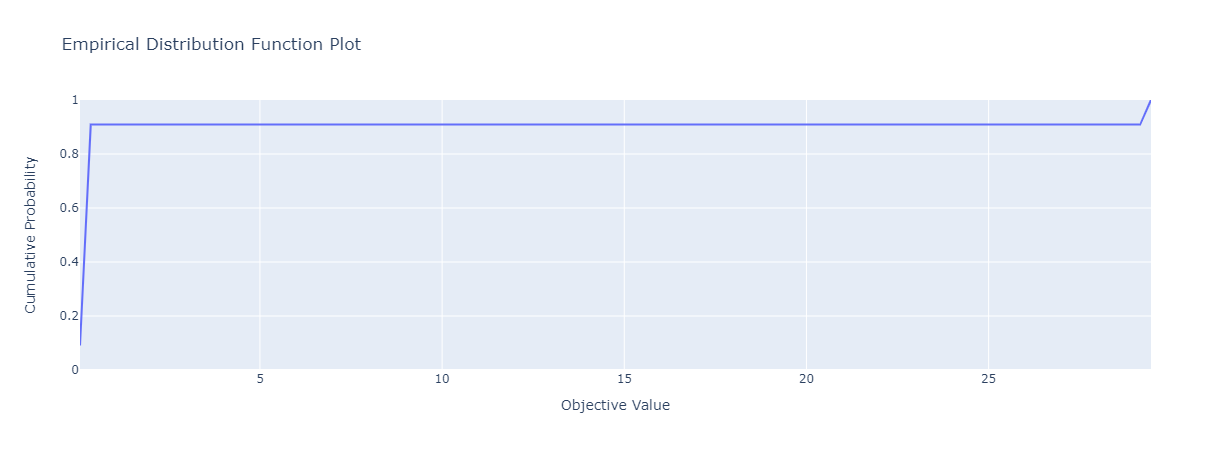

In [7]:
import optuna
optuna.visualization.plot_edf(ad.study)

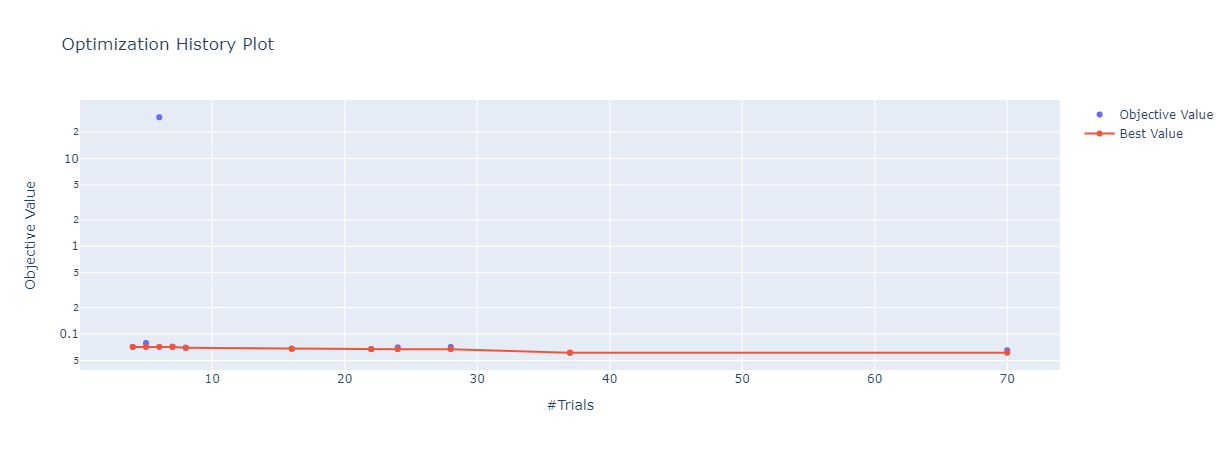

In [8]:
fig = optuna.visualization.plot_optimization_history(ad.study)
fig.update_yaxes(type='log')

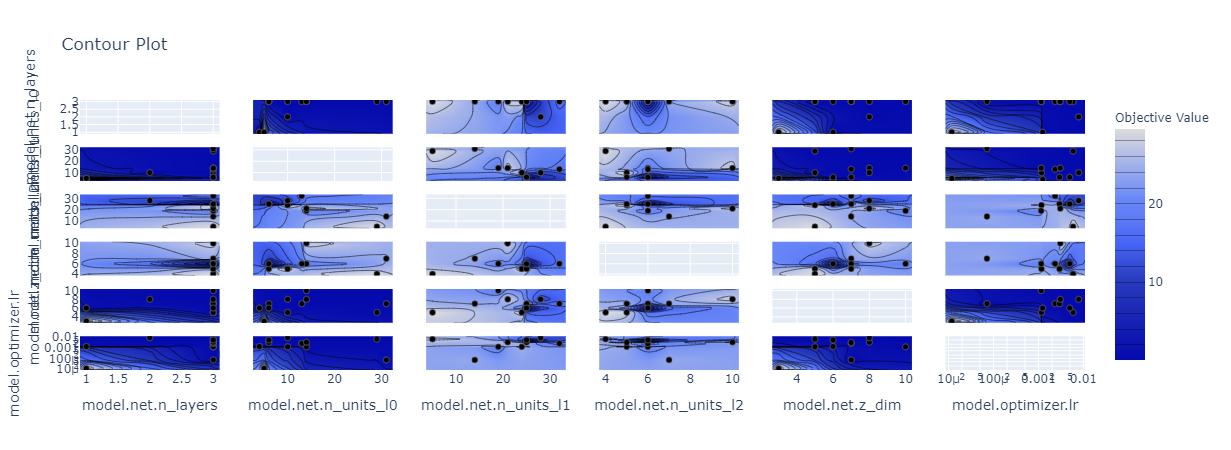

In [9]:
optuna.visualization.plot_contour(ad.study)

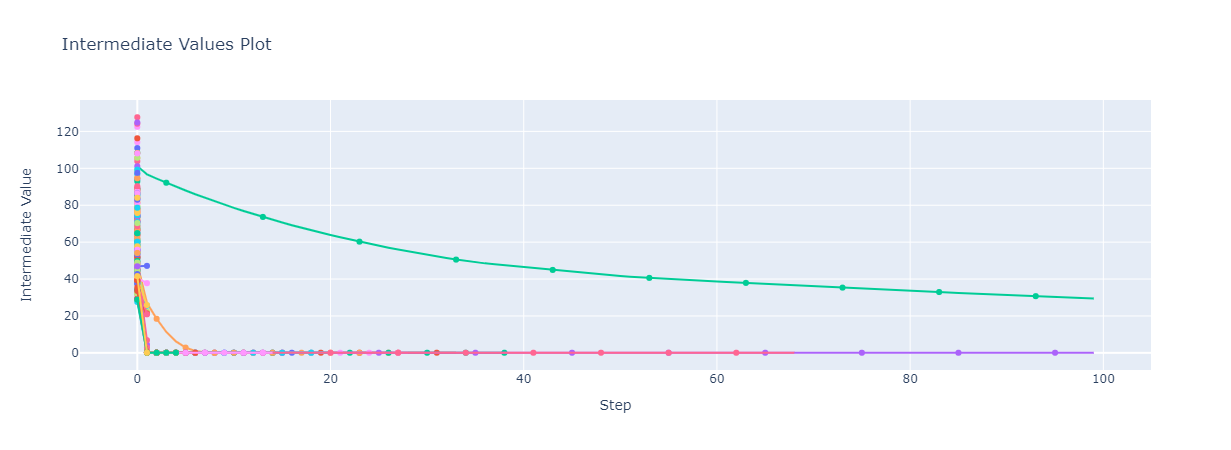

In [10]:
optuna.visualization.plot_intermediate_values(ad.study)

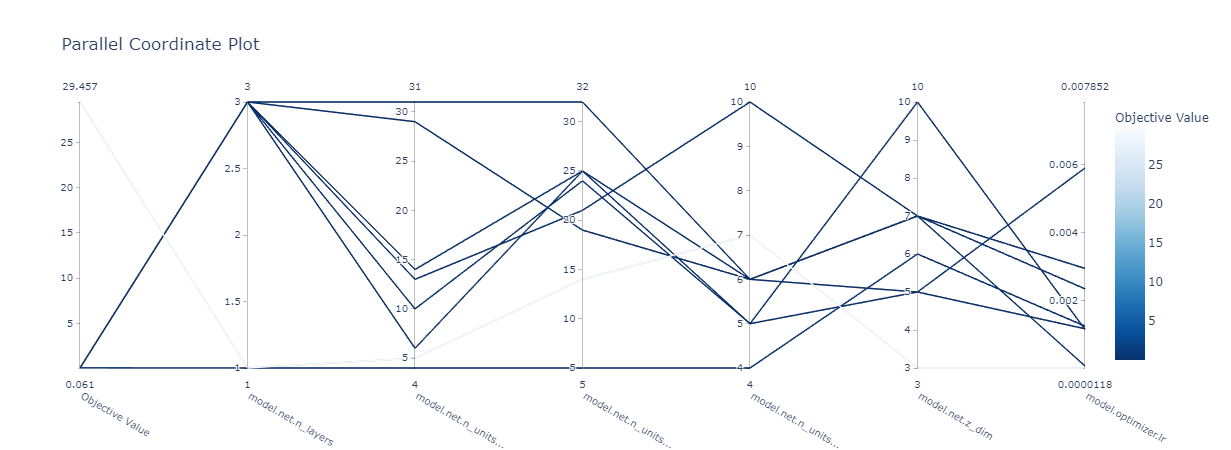

In [11]:
optuna.visualization.plot_parallel_coordinate(ad.study)

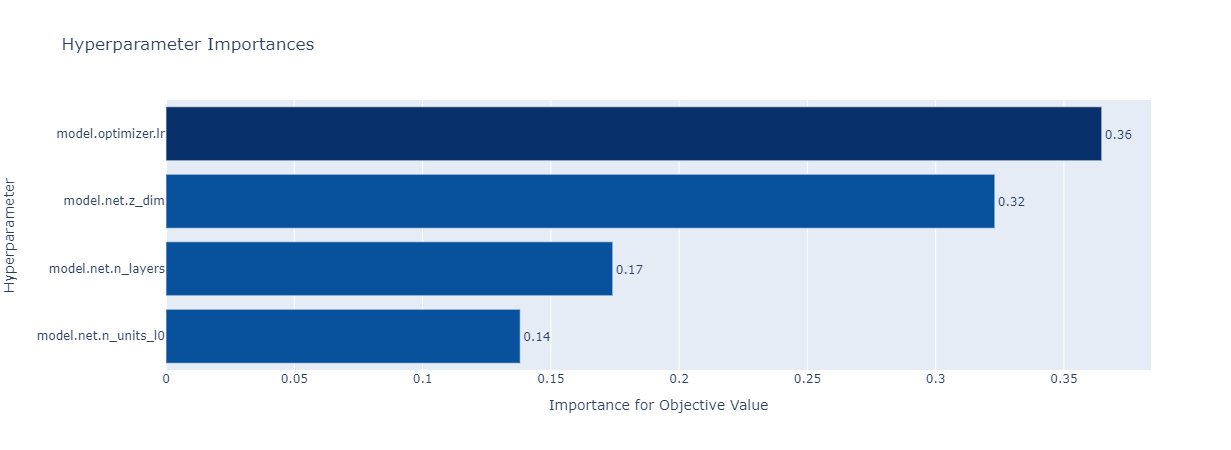

In [12]:
optuna.visualization.plot_param_importances(ad.study)

## 最適(と思われる)パラメータ

In [13]:
ad.study.best_params

{'model.net.n_layers': 3,
 'model.net.n_units_l0': 6,
 'model.net.n_units_l1': 25,
 'model.net.n_units_l2': 6,
 'model.net.z_dim': 6,
 'model.optimizer.lr': 0.004976247769663489}

'last.ckpt'を読み込むときには

## optuna-dashboard での表示

oputuna-dashboard のインストールと起動
```
 % pip install optuna-dashboard
 % cd <project_dir>
 % optuna-dashboard sqlite:///<run_dir>/<storage_name>.db -h <host> -p <port>
```

defaultでの起動は http://localhost:8080/ でアクセス可能

# best param での実行

In [5]:
config = load_config('config','config',overrides=['model.net.z_dim=3','model.net.hidden_size=[10,10]','model.optimizer.lr=1e-4'])

In [6]:
from src import AnomalyDetector
ad = AnomalyDetector(config)

AutoEncoder(
  (encoder): Encoder(
    (act): ReLU()
    (hidden): ModuleList(
      (0): Linear(in_features=14, out_features=10, bias=True)
      (1): ReLU()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=10, out_features=10, bias=True)
      (4): ReLU()
      (5): Dropout(p=0, inplace=False)
    )
    (z): Linear(in_features=10, out_features=3, bias=True)
  )
  (decoder): Decoder(
    (act): ReLU()
    (hidden): ModuleList(
      (0): Linear(in_features=3, out_features=10, bias=True)
      (1): ReLU()
      (2): Dropout(p=0, inplace=False)
      (3): Linear(in_features=10, out_features=10, bias=True)
      (4): ReLU()
      (5): Dropout(p=0, inplace=False)
    )
    (output): Linear(in_features=10, out_features=14, bias=True)
  )
)


In [7]:
ad.train(dm=dm, max_epochs=200)

GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type    | Params
------------------------------------
0 | encoder | Encoder | 293   
1 | decoder | Decoder | 304   
------------------------------------
597       Trainable params
0         Non-trainable params
597       Total params


Validation sanity check: |                                                                       | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Saving latest checkpoint...


# 評価

In [8]:
anomaly_scores = ad.get_anomaly_scores(dm=dm)

Testing: |                                                                                       | 0/? [00:00<…

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_loss': tensor(0.0010), 'val_loss': tensor(0.0706)}
--------------------------------------------------------------------------------


In [9]:
import pandas as pd
df = pd.DataFrame(anomaly_scores)

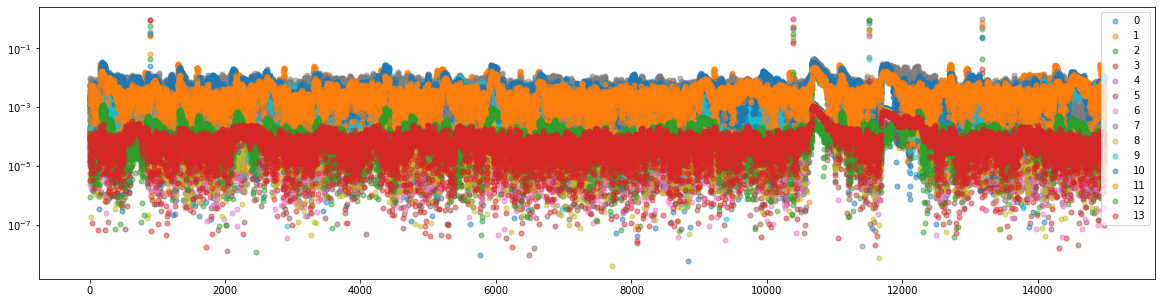

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
df.plot.line(ax=ax, style='o',ms=5, alpha=.5)
ax.semilogy()
#df.rolling(50, center=True).mean().plot.line(ax=ax, style='g--', alpha=.5)
#ax2 = ax.twinx()
#pd.read_csv('./data/dsc_2019/predict/data01_predict.csv').plot(ax=ax2,style='--', alpha=.3, label='observe')
#fig.savefig('tmp.svg')
plt.show()

In [11]:
from scipy.io import arff
import pandas as pd
label, _ = arff.loadarff('data/EEG/EEG Eye State.arff')
label = pd.DataFrame(label).values

In [12]:
label = label[:,[-1]]
label = label.astype(int)

In [13]:
len(label)

14980

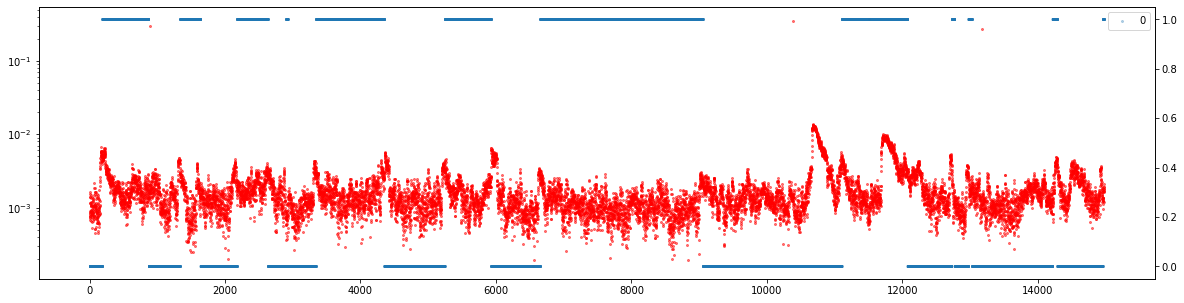

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
df.mean(axis=1).plot.line(ax=ax, style='ro',ms=2, alpha=.5)
#df.rolling(50, center=True).mean().plot.line(ax=ax, style='g--', alpha=.5)
ax.semilogy()
ax2 = ax.twinx()
pd.DataFrame(label).plot(ax=ax2, style='o', ms=2, alpha=.3, label='observe')
#fig.savefig('tmp.svg')
plt.show()

eysState==b'1'(== eye close)をtrain/valデータとして使って使っているんだけど、脳波だと目をつむっていても関係ない刺激があるということなのかな。先に特徴エンジニアリングが必要な感じかぁ...